<a href="https://colab.research.google.com/github/JumperWacky/Jumper/blob/main/mnist_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset

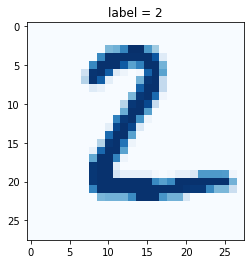

In [ ]:
df = pandas.read_csv("/content/sample_data/mnist_test.csv")
row = 0
data = df.iloc[row]

label = data[0]

img = data[1:].values.reshape(28, 28)
plt.title("label = " + str(label))
plt.imshow(img, interpolation = 'none', cmap = 'Blues')
plt.show()

In [ ]:
class Classifier(nn.Module):
  def __init__(self):
    # 初始化Pytorch父类
    super(Classifier, self).__init__()

    # 定义神经网络层
    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.LeakyReLU(0.02),
        # nn.Sigmoid(),

        nn.LayerNorm(200),

        nn.Linear(200, 10),
        # nn.LeakyReLU(0.02)
        nn.Sigmoid()
    )

    # 创建损失函数
    # self.loss_function = nn.MSELoss()
    self.loss_function = nn.BCELoss()

    # 创建优化器
    # self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
    self.optimizer = torch.optim.Adam(self.parameters())

    # 可视化训练，记录训练进展的计数器和列表
    self.counter = 0
    self.progress = []
    pass
  
  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):
    # 计算网络的输出值
    outputs = self.forward(inputs)
    # 计算损失值
    loss = self.loss_function(outputs, targets)

    # 梯度归零，反向传播，更新权重
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()

    # 每隔10个训练样本增加一次计数器的值，并将损失值添加进列表的末尾
    self.counter += 1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass
    if(self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass
  
  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0,1.0), figsize=(16,8), alpha=0.1, marker='.',
        grid=True, yticks=(0,0.25,0.5))
    pass
    

In [ ]:
# Dataset类，用于data预处理，data传入等
class MnistDataset(Dataset):
  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header=None)
  
  def __len__(self):
    return len(self.data_df)
  
  def __getitem__(self, index):
    # 图像label one-hot编码
    label = self.data_df.iloc[index, 0]
    target = torch.zeros(10)
    target[label] = 1.0

    # 图像数据
    # iloc生成一个二维区域，values生成一个numpy.array
    image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

    # 返回标签、图像数据张量及目标张量
    return label, image_values, target
  
  def plot_image(self, index):
    arr = self.data_df.iloc[index, 1:].values.reshape(28, 28)
    plt.title("label = " + str(self.data_df.iloc[index,0]))
    plt.imshow(arr, interpolation='none', cmap='Blues')
    pass

In [ ]:
mnist_data = MnistDataset('/home/sample_data/mnist_train.csv')
# mnist_data.plot_image(10)

In [ ]:
%%time
# 创建神经网络
C = Classifier()
epochs = 3

for i in range(epochs):
  print('training epoch', i+1, 'of', epochs)
  for label, image_data_tensor, target_tensor in mnist_data:
    C.train(image_data_tensor, target_tensor)

training epoch 1 of 3
counter =  10000
training epoch 2 of 3
counter =  20000
training epoch 3 of 3
counter =  30000
CPU times: user 49.6 s, sys: 116 ms, total: 49.7 s
Wall time: 50.5 s


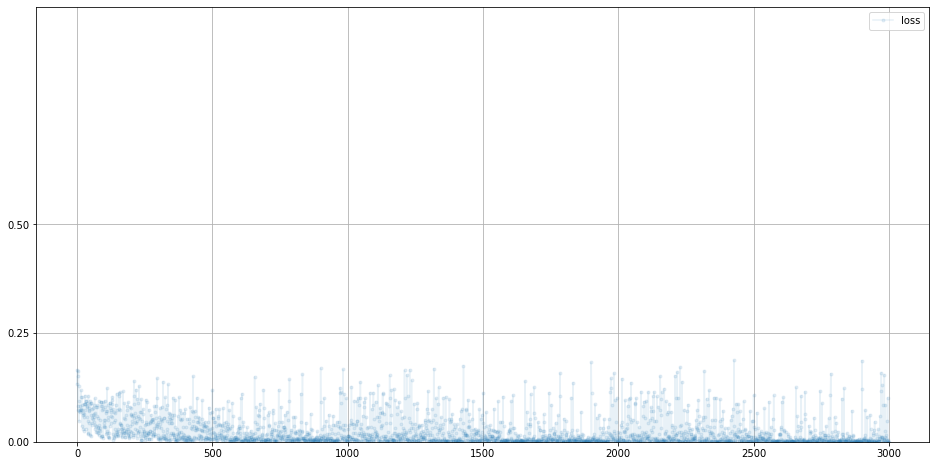

In [ ]:
C.plot_progress()

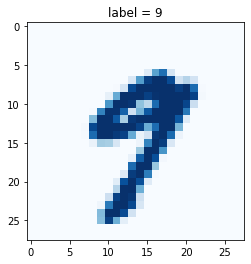

In [ ]:
# 加载MNIST测试数据
mnist_test_dataset = MnistDataset("/home/sample_data/mnist_test.csv")
record = 20

mnist_test_dataset.plot_image(record)

<Axes: >

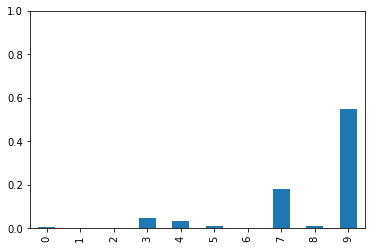

In [ ]:
image_data = mnist_test_dataset[record][1]

# 调用训练后的神经网路
output = C.forward(image_data)

# 绘制输出张量
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [ ]:
score, items = 0, 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label):
    score += 1
  items += 1
print(score, items, score/items)

9090 10000 0.909
